In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from jupyterthemes import jtplot
jtplot.style(theme='chesterish', context='notebook', ticks=True, grid=False)

# Assumptions
* The data from the government webste is consideredto e reliable
* The statistics of various surveys are considered reliable (links provided where those stats are used)
* The political factors such as racism against chinese students have not been taken into account

# Load the files

The file was obtained from The Department of Home Affairs (https://data.gov.au/dataset/ds-dga-324aa4f7-46bb-4d56-bc2d-772333a2317e/details). This is a government website, hence the data is considered to be reliable. The excel worksheet was orginally unreadable through the normal read functions. The data was extracted in readable form via converting it to a text file and getting rid of all the unwanted items.

In [2]:
df = pd.read_csv('Visas_lodged.csv',header=1, thousands=',')
print(df.shape)
df.head()

(17, 17)


,Applicant Type,Sector,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17,2017-18,2018-19,2019-20 to 30 June 2020
0,Primary,Foreign Affairs or Defence Sector,2840,2709,2510,2534,2573,2892,3945,4940,4768,4597,3917,5002,5008,3861,2739
1,Primary,Higher Education Sector,94796,108025,118781,122455,109814,104869,107650,124492,144874,148674,155486,163204,179282,206637,169940
2,Primary,Independent ELICOS Sector,26603,30522,29811,38142,33891,29547,28939,29870,30596,32736,35944,41502,40596,42284,33503
3,Primary,Non-Award Sector,17749,17823,20975,19244,18064,17250,16314,17716,19413,19333,20443,20592,21104,20466,12217
4,Primary,Postgraduate Research Sector,3826,4172,4378,5171,5393,5649,6204,6484,6532,6524,6527,6663,7096,7797,7466


Due to the anomaly caused by COVID-19, the last column will be dropped and analysed separately month by month

In [3]:
df.drop(['2019-20 to 30 June 2020'],inplace=True,axis=1)
df.columns

Index(['Applicant Type', 'Sector', '2005-06', '2006-07', '2007-08', '2008-09',
       '2009-10', '2010-11', '2011-12', '2012-13', '2013-14', '2014-15',
       '2015-16', '2016-17', '2017-18', '2018-19'],
      dtype='object')

Most of the applicants are primary applicants and there cannot be secondary applicants without primary hence the analysis will be conducted on them.

In [4]:
primary_df = df[df['Applicant Type']=='Primary']
primary_df.set_index('Sector',inplace=True);
primary_df.drop('Applicant Type',inplace=True,axis=1);
print(primary_df.shape)
primary_df

(7, 14)


C:\Users\nagpa\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17,2017-18,2018-19
Sector,,,,,,,,,,,,,,
Foreign Affairs or Defence Sector,2840,2709,2510,2534,2573,2892,3945,4940,4768,4597,3917,5002,5008,3861
Higher Education Sector,94796,108025,118781,122455,109814,104869,107650,124492,144874,148674,155486,163204,179282,206637
Independent ELICOS Sector,26603,30522,29811,38142,33891,29547,28939,29870,30596,32736,35944,41502,40596,42284
Non-Award Sector,17749,17823,20975,19244,18064,17250,16314,17716,19413,19333,20443,20592,21104,20466
Postgraduate Research Sector,3826,4172,4378,5171,5393,5649,6204,6484,6532,6524,6527,6663,7096,7797
Schools Sector,14880,18482,20445,15806,13184,11115,10309,9988,11446,13195,13653,13857,12686,12286
Vocational Education and Training Sector,32350,46781,66335,101099,66891,63634,61861,54355,54606,61507,76992,77626,95405,114470


# Inital Visualization

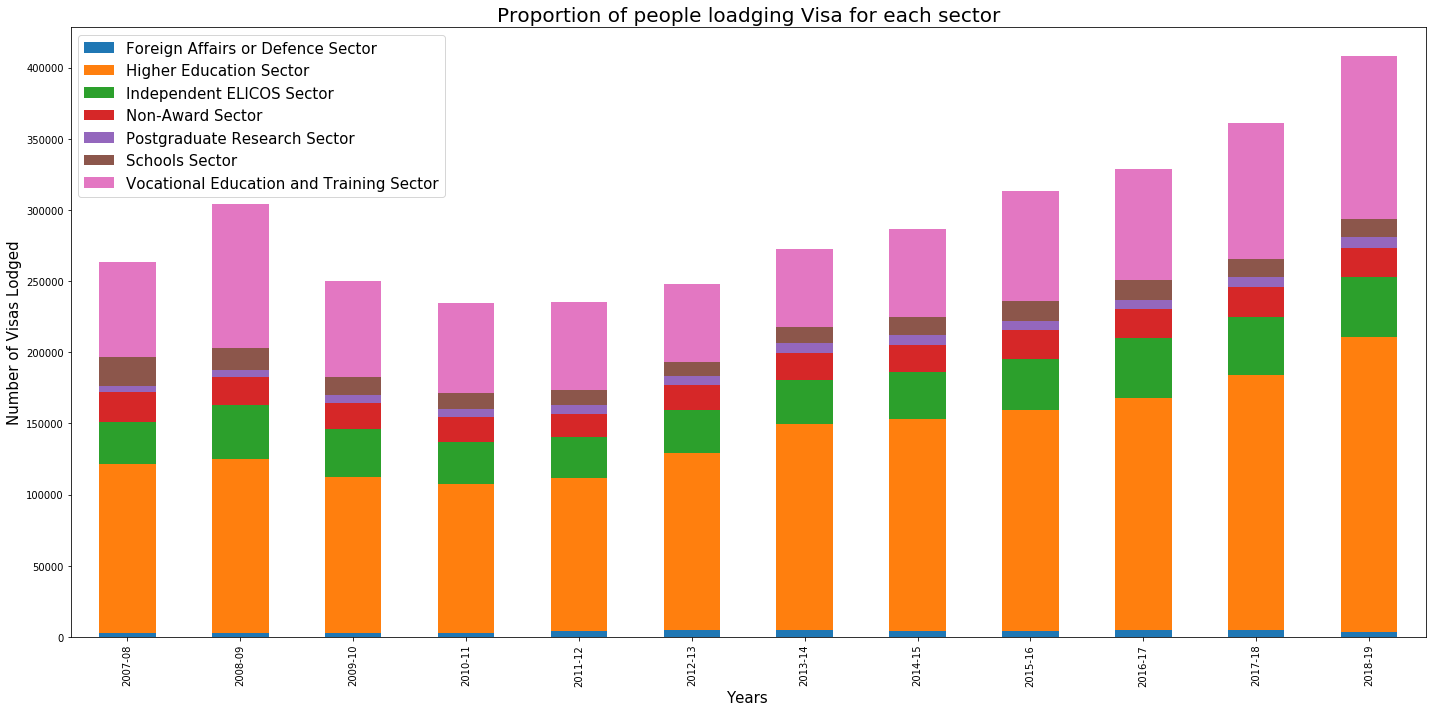

In [53]:
cols = np.array(primary_df.columns)
mask = np.ones(len(cols), dtype=bool)
mask[[0,1]] = False
cols = cols[mask]

primary_df[cols].astype('int').transpose().plot(kind='bar',
                                                stacked=True,
                                                figsize=(20,10));

plt.legend(fontsize = 15);
plt.xlabel('Years',fontsize=15);
plt.ylabel('Number of Visas Lodged',fontsize=15);
plt.title('Proportion of people loadging Visa for each sector',fontsize=20);
plt.tight_layout()
plt.savefig('1) Proportions_by_sectors.png')
plt.show()

To see the similarity in trends, all the sectors will be normalised. If all sectors follow similar trends, then the total of all the sectors can be modelled and the predictions can be made.

In [7]:
norm_primary = primary_df.transpose().copy()
for i in primary_df.index.values:
    norm_primary[i]=((norm_primary[i])/(norm_primary[i].max()))
norm_primary.transpose().head()

,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17,2017-18,2018-19
Sector,,,,,,,,,,,,,,
Foreign Affairs or Defence Sector,0.567093,0.540935,0.501198,0.505990,0.513778,0.577476,0.787740,0.986422,0.952077,0.917931,0.782149,0.998802,1.000000,0.770966
Higher Education Sector,0.458756,0.522777,0.574829,0.592609,0.531434,0.507503,0.520962,0.602467,0.701104,0.719494,0.752460,0.789810,0.867618,1.000000
Independent ELICOS Sector,0.629151,0.721833,0.705018,0.902043,0.801509,0.698775,0.684396,0.706414,0.723583,0.774194,0.850061,0.981506,0.960079,1.000000
Non-Award Sector,0.841025,0.844532,0.993887,0.911865,0.855951,0.817381,0.773029,0.839462,0.919873,0.916082,0.968679,0.975739,1.000000,0.969769
Postgraduate Research Sector,0.490702,0.535078,0.561498,0.663204,0.691676,0.724509,0.795691,0.831602,0.837758,0.836732,0.837117,0.854559,0.910094,1.000000


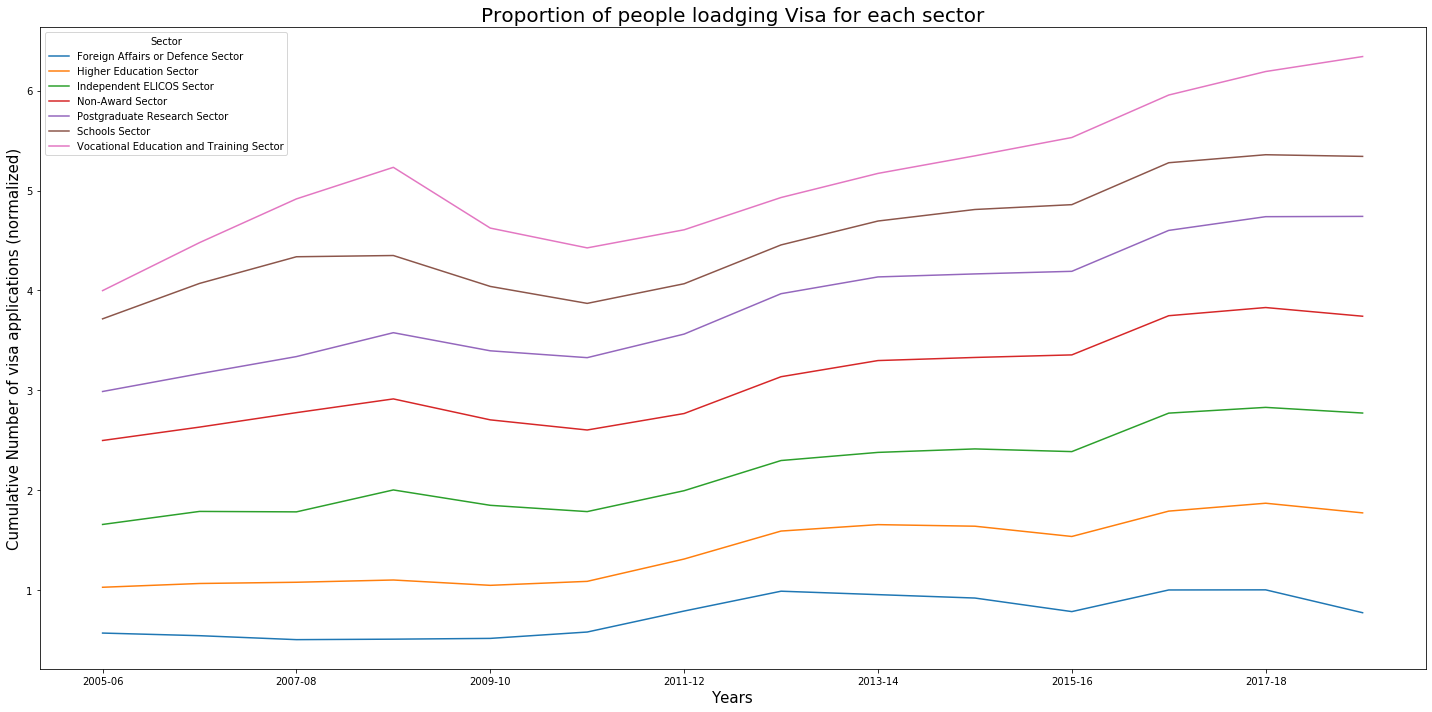

In [54]:
norm_primary.plot(kind='line',
                  stacked=True,
                 figsize=(20,10)
                 )
plt.xlabel('Years',fontsize=15);
plt.ylabel('Cumulative Number of visa applications (normalized)',fontsize=15);
plt.title('Proportion of people loadging Visa for each sector',fontsize=20);
plt.tight_layout()
plt.savefig('2) Stacked_trends_by_sector.png')

Since all the trends are very similar to each other with minor differences, the forecasting can be estimated via the grand total instead forcasting each sector individually

# Analysis

In [11]:
total_primary_df = pd.DataFrame(primary_df.sum())
total_primary_df.columns = ['Number of visa applictions']
total_primary_df.tail()

,Number of visa applictions
2014-15,286566
2015-16,312962
2016-17,328446
2017-18,361177
2018-19,407801


In [93]:
# sns.regplot(np.linspace(2006,2019,len(total_primary_df)),'Number of visa applictions',data=total_primary_df)
# plt.xlabel('Years');

We can try fitting in a linear model and check the $R^2$ value

In [13]:
from sklearn.linear_model import LinearRegression

In [56]:
lm = LinearRegression()
y = total_primary_df[['Number of visa applictions']] 
y = np.array(y).reshape(-1,1)
x = np.linspace(2006,2019,len(total_primary_df)).reshape(-1,1)
 
lm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [57]:
print("The slope of the best fit lne in linear regression is ",lm.coef_)

The slope of the best fit lne in linear regression is  [[11441.42857143]]


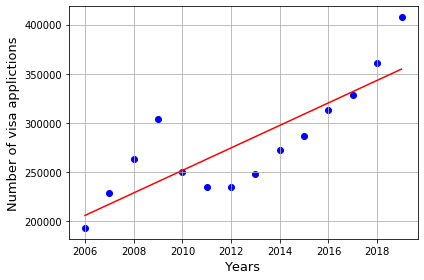

In [61]:
plt.scatter(x,y,  color='blue')
plt.plot(x, lm.coef_*x + lm.intercept_, '-r')
plt.xlabel('Years',fontsize=13);
plt.ylabel('Number of visa applictions',fontsize=13);
plt.grid('major')
plt.tight_layout()
plt.savefig('3) Initial_line_of_best_fit.png')

In [62]:
yhat = lm.predict(x)
yhat[0:4]

array([[206078.14285714],
       [217519.57142857],
       [228961.        ],
       [240402.42857143]])

In [63]:
(yhat-y)[0:5]

array([[ 13034.14285714],
       [-10994.42857143],
       [-34274.        ],
       [-64048.57142857],
       [  2033.85714285]])

So we see a  $\pm$ devation of about 10000 students which means the predictions are not very good

# Accuracy Check

In [64]:
from sklearn.metrics import r2_score

In [65]:
r2_score(y,yhat)

0.684193933212412

This value is considered moderately-strongly effective in forecasting the future scenarios

# Increasing the accuracy

There is a sharp decrease in the number of students observed between the years 2009 and 2010. It is around that time that we see a sharp decrease in the number of students coming in through the vocational education and training sector as well as a minor decrease in the other sectors. This decrease was the result of a declination of visas from a large number of students due to change in visa regulations and the general skilled residency program (https://www.abs.gov.au/ausstats/abs@.nsf/lookup/4102.0main+features20dec+2011). 

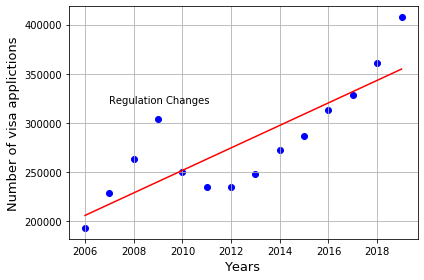

In [66]:
plt.scatter(x,y,  color='blue')
plt.plot(x, lm.coef_*x + lm.intercept_, '-r')
plt.annotate('Regulation Changes',(2007,320000))
plt.xlabel('Years',fontsize=13);
plt.ylabel('Number of visa applictions',fontsize=13);
plt.tight_layout()
plt.grid('both')
plt.savefig('4) Initial_line_of_best_fit_annotated.png')
plt.show()

Since an external factor (i.e regulation changes) affected the normal trend of the flux of international students in australia, the data points from before 2010 can be omitted so as to forecast the flux of students with the current policies

In [67]:
currentreg_df = total_primary_df[6:len(total_primary_df)]
currentreg_df.head()

,Number of visa applictions
2011-12,235222
2012-13,247845
2013-14,272235
2014-15,286566
2015-16,312962


In [68]:
# sns.regplot(np.linspace(2011,2019,len(currentreg_df)),'Number of students',data=currentreg_df)
# plt.xlabel("Year");

In [69]:
reg = LinearRegression()
y = currentreg_df[['Number of visa applictions']] 
y = np.array(y).reshape(-1,1)
x = np.linspace(2006,2019,len(currentreg_df)).reshape(-1,1)
 
reg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

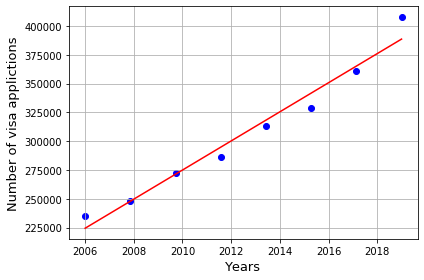

In [70]:
plt.scatter(x,y,  color='blue')
plt.plot(x, reg.coef_*x + reg.intercept_, '-r')
plt.xlabel('Years',fontsize=13);
plt.ylabel('Number of visa applictions',fontsize=13);
plt.tight_layout()
plt.grid('both')
plt.savefig('5) Final_line_of_best_fit.png')

In [71]:
yhat = reg.predict(x)
yhat[0:4]

array([[224459.16666667],
       [247908.47619048],
       [271357.78571429],
       [294807.0952381 ]])

In [72]:
(yhat-y)

array([[-10762.83333333],
       [    63.47619048],
       [  -877.21428571],
       [  8241.0952381 ],
       [  5294.4047619 ],
       [ 13259.71428571],
       [  3978.02380952],
       [-19196.66666666]])

In [73]:
r2_score(y,yhat)

0.9676244700172266

So we see that this model works very well with the data we have after the regulation change. 

If every thing were normal, in the next 3 years, there would be more students following this trend.

# Predicting the number of visas lodged in future years 

In [74]:
threeyr_students_normal = reg.predict(np.array([2020,2021,2022]).reshape(-1,1))
threeyr_students_normal

array([[401230.88461538],
       [413857.43589744],
       [426483.98717949]])

In [75]:
print("Australia would have had about",round(int(np.sum(threeyr_students_normal))),"new visas lodged in the next 3 years if everything were normal")

Australia would have had about 1241572 new visas lodged in the next 3 years if everything were normal


However, in the first few months of 2020, the COVID-19 pandemic broke out resulting in travel bans all accross the world and many students hesitating to go overseas to study. Common intuition and perception would be that a sharp decrease in the number of visas lodged will be observed.

# Effect of COVID-19 on enrollments in the education sector

The month wise data was obtained from (https://internationaleducation.gov.au/research/International-Student-Data/Pages/InternationalStudentData2020.aspx)

In [76]:
sector_monthly_df = pd.read_csv('Monthy_Visa_Enrollments_12-20.csv')
sector_monthly_df.head()

,Sector,Month,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Higher Education,Jan,144046,137698,142293,157129,176590,203099,236097,267097,283966
1,Higher Education,Feb,184592,166976,168906,183103,231892,261580,298736,321514,329819
2,Higher Education,Mar,191139,185791,197471,215663,242309,277392,316975,357634,361130
3,Higher Education,Apr,191837,186560,198248,216429,243264,278608,317776,358631,361685
4,Higher Education,May,192590,187406,199395,217703,244345,279943,319255,360355,362992


Now, lets take the new enrollemnts per month

In [77]:
monthly_df = sector_monthly_df.groupby('Month',sort=False).sum()

In [78]:
net_enrollments = (monthly_df[['2017','2018','2019','2020']].diff(axis=0))#.astype('int')
net_enrollments.loc['Jun'][3] = 0
net_enrollments.loc['Jan'] = (monthly_df.loc['Jan']-np.roll(monthly_df.loc['Dec'],1))
net_enrollments=net_enrollments.astype('int')
net_enrollments

,2017,2018,2019,2020
Month,,,,
Jan,-321392,-358732,-386473,-426324
Feb,93677,100683,92977,82997
Mar,35930,38019,57711,54462
Apr,25479,30294,34649,26712
May,21392,18735,20009,17669
Jun,16919,18243,17587,0
Jul,98365,104678,96938,0
Aug,24058,25320,35584,0
Sep,21786,23239,34271,0


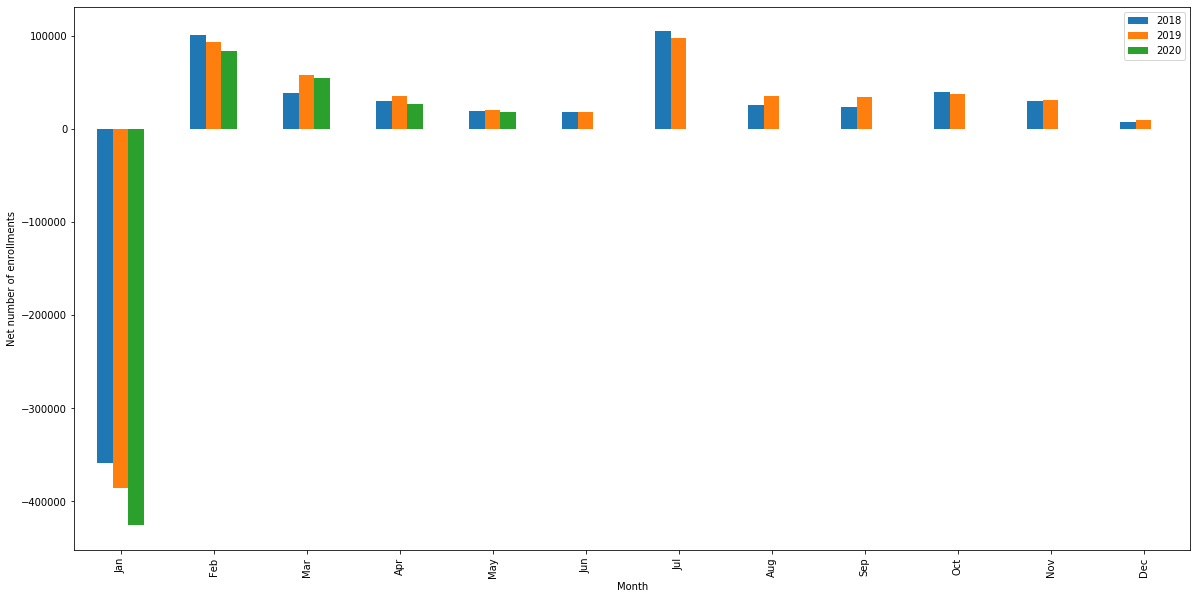

In [79]:
net_enrollments[['2018','2019','2020']].plot(kind='bar',figsize=(20,10));
plt.ylabel('Net number of enrollments');

We see a negative bar in January becase a lot of students finish their studies in January whereas momst of the new students tend to enrol themselves in February which can be seen through the commencement data (https://internationaleducation.gov.au/research/International-Student-Data/Pages/InternationalStudentData2020.aspx). Hence, the trend shall be observed without data in January.

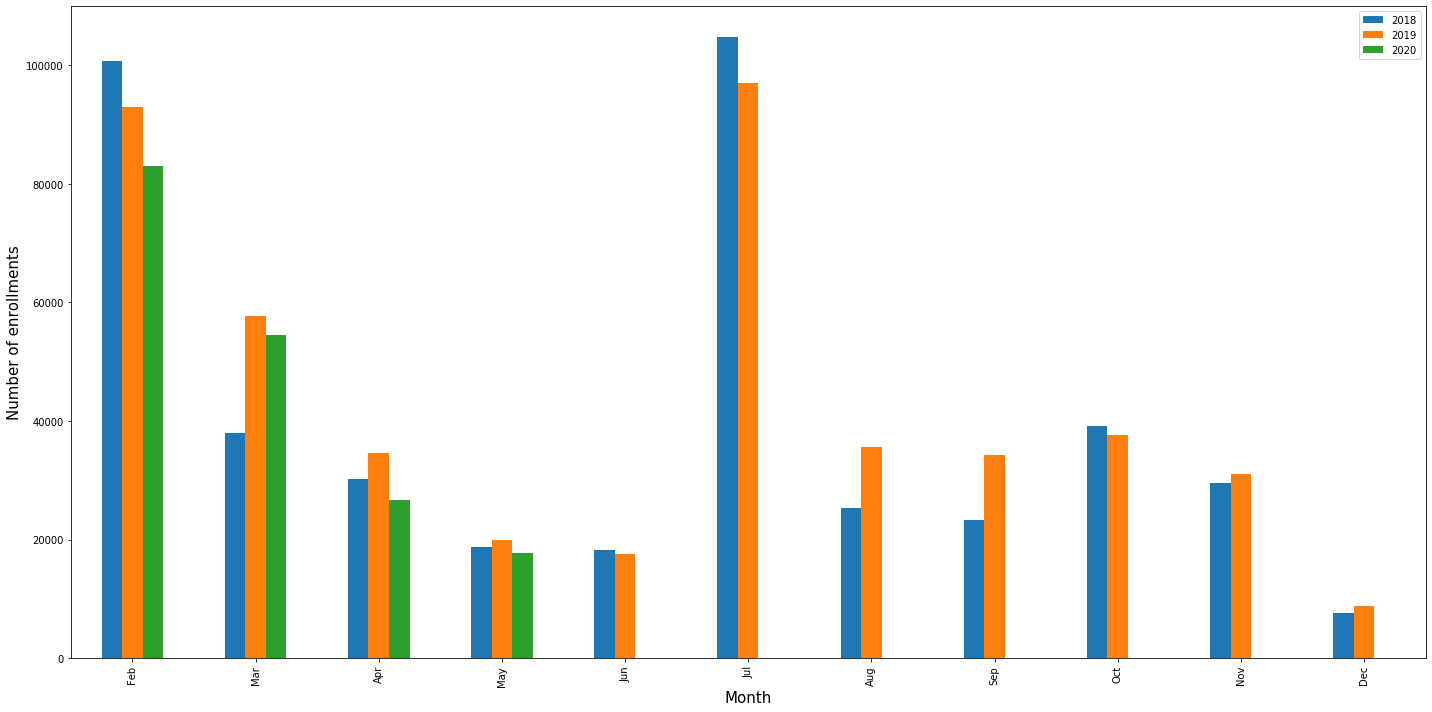

In [81]:
new_enrollments = (monthly_df[['2017','2018','2019','2020']].diff(axis=0))#.astype('int')
new_enrollments.loc['Jun'][3] = 0
new_enrollments = new_enrollments.dropna()
new_enrollments=new_enrollments.astype('int')
new_enrollments[['2018','2019','2020']].plot(kind='bar',figsize=(20,10));
plt.ylabel('Number of enrollments',fontsize=15);
plt.xlabel('Month',fontsize=15)
plt.tight_layout()
plt.savefig('6) Monthly new enrollments.png')

We know that in Australia, there are two major waves in which there are many enrollments i.e - Febuary and July which is indeed what we see above. However, quite a few students enroll in subsequent months such as March and so, let us have a look at the cumulative data month by month

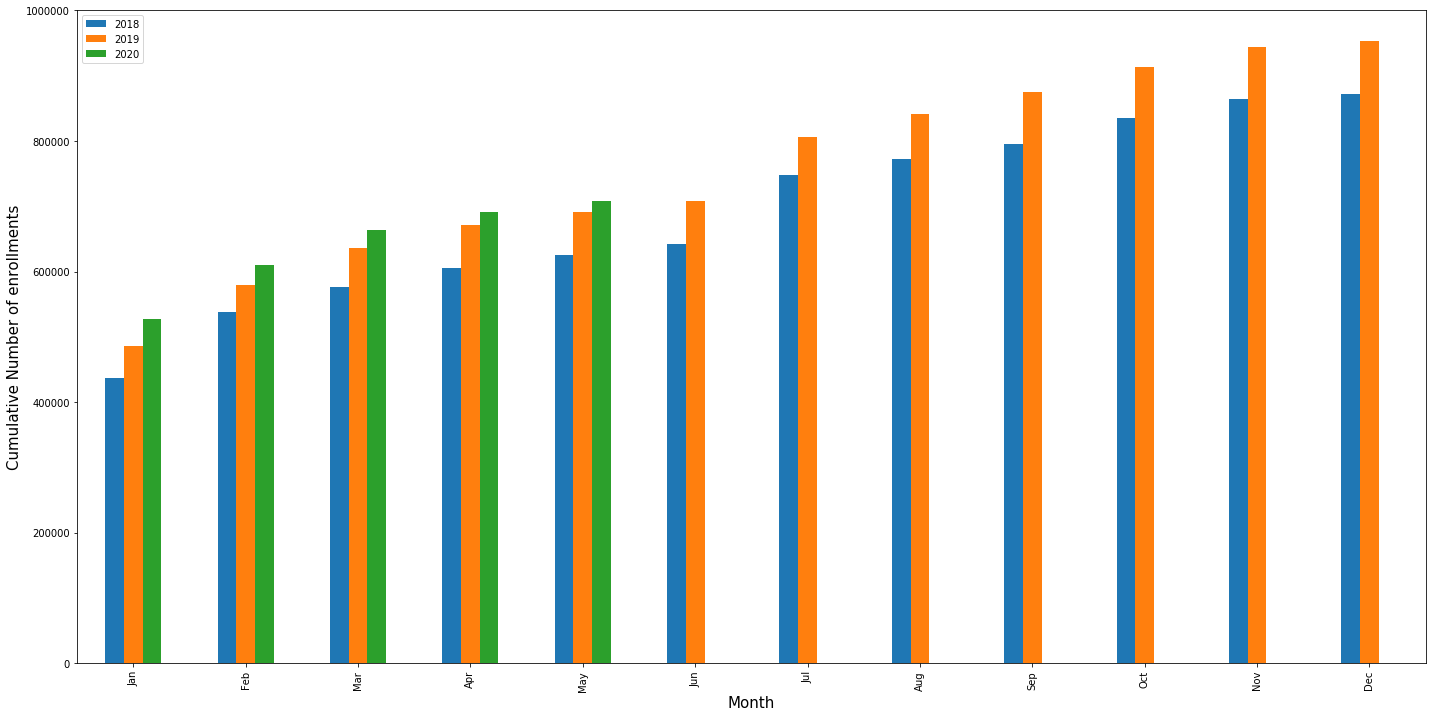

In [83]:
monthly_df[['2018','2019','2020']].plot(kind='bar',figsize=(20,10));
plt.ylabel('Cumulative Number of enrollments',fontsize=15);plt.tight_layout()
plt.xlabel('Month',fontsize=15)
plt.savefig('7) Cumulative enrollments bar.png')

We can now forecast the number of student enrollments

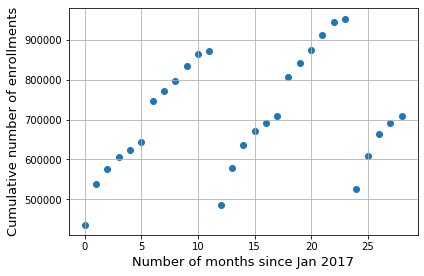

In [84]:
arr = np.append(np.array(monthly_df['2018']),np.array(monthly_df['2019']))
mask = np.array(monthly_df['2020'])
mask = mask[mask>0]
monthly_arr = np.append(arr,mask)
plt.scatter(np.arange(len(monthly_arr)),monthly_arr)
plt.xlabel('Number of months since Jan 2017',fontsize=13)
plt.ylabel('Cumulative number of enrollments',fontsize=13)
plt.grid('both')
plt.tight_layout()
plt.savefig('8) Cumulative enrollments scatter.png')

A nice recurring pattern is observed. Let us import an older data set from 2012 (after the reguation changes) to see if the pattern has repeated over the years.

In [85]:
years = np.array(monthly_df.columns)
arr = np.array([])
for i in range(len(years)):
    temp = np.array(monthly_df[years[i]])
    temp = temp[temp!=0]
    arr = np.append(arr,temp)

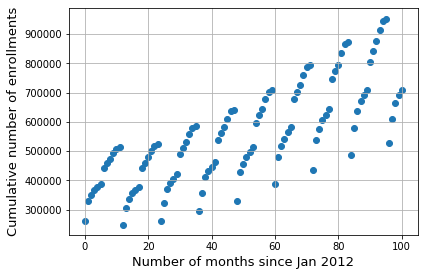

In [86]:
plt.scatter(np.arange(len(arr)),arr);
plt.xlabel('Number of months since Jan 2012',fontsize=13)
plt.ylabel('Cumulative number of enrollments',fontsize=13);
plt.grid('both')
plt.tight_layout()
plt.savefig('9) Cumulative enrollments scatter 12-20.png')

There is an obvious growth that can be observed from the plot above.

There was growth of 9.18% every year sicne 2012 to 2019


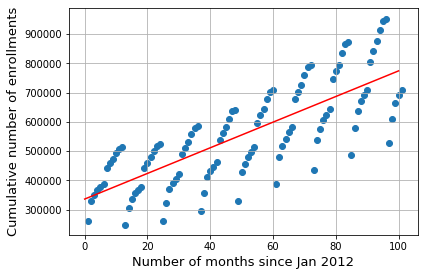

In [88]:
lm = LinearRegression()
months = np.arange(len(arr)).reshape(-1,1)
arr = arr.reshape(-1,1)
lm.fit(months+1,arr);
plt.scatter(np.arange(len(arr))+1,arr);
yhat = lm.predict(months+1)
plt.plot(months,yhat,'-r')
plt.xlabel('Number of months since Jan 2012',fontsize=13)
plt.ylabel('Cumulative number of enrollments',fontsize=13);
plt.grid('both');plt.tight_layout()
plt.savefig('10) Cumulative enrollments scatter 12-20 bestfit.png')
growth = (np.max(yhat)/np.min(yhat))**(1/9.5)-1
print("There was growth of {}% every year sicne 2012 to 2019".format(round(growth*100,2)))

Although the trend doesn't seem to be affected very much, the data regarding the enrollments in July 2020 will be the big reveal. According to a survey, (https://monitor.icef.com/2020/04/new-survey-data-measures-student-intent-for-study-abroad/) about 60% of the international students planned to defer their studies. By incorporating the 60% decline, we can make a forecast of the number of new enrollments in Australia in May 2021.

# Forecast - Inoming International students till December

In [50]:
years = np.array(monthly_df.columns)
dec_arr = np.array([])
may_arr = np.array([])
for i in range(len(years)):
    temp = np.array(monthly_df[years[i]])
    temp = temp[temp!=0]
    try:
        dec_arr = np.append(dec_arr,temp[11])
    except:
        pass
    may_arr = np.append(may_arr,temp[4])

Number of students that will arrive in between July and December  taking into consideration the 60% students who prefer to defer their studies can be calculated using

$$
0.4 \times \left(\text{Predicted students enrolled by December (normal trend)} - \text{Students enrolled by May}\right)
$$

In [51]:
# December Prediction
yrs = np.linspace(2012,2020,9).reshape(-1,1)
dec = LinearRegression().fit(yrs[0:8],dec_arr)

# Forecast

---------------------------------------------------------------------------------------------------------------------------------------------------
Predicted number of incoming international students by the end of December 2020 will be 114513 which was supposed to be 286284 under normal circumstances
---------------------------------------------------------------------------------------------------------------------------------------------------


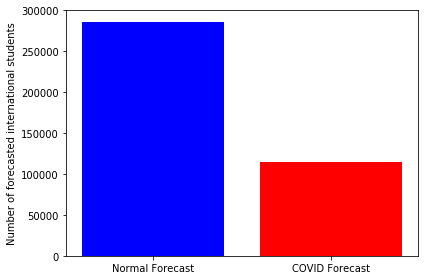

In [92]:
dec_val = dec.predict(np.array([2020]).reshape(-1,1))
may_val = may_arr[-1]
forecast = 0.4*(dec_val-may_val)
print("---------------------------------------------------------------------------------------------------------------------------------------------------")
print("Predicted number of incoming international students by the end of December 2020 will be {} which was supposed to be {} under normal circumstances".
      format(int(forecast),int(dec_val-may_val)))
print("---------------------------------------------------------------------------------------------------------------------------------------------------")
plt.bar(np.array(['Normal Forecast','COVID Forecast',]),np.array([int(dec_val-may_val),int(forecast)]),color=('b', 'r'))
plt.ylabel('Number of forecasted international students');
plt.tight_layout()
plt.savefig('11) Normal vs COVID forecast.png')

# Limitations

There are various limiting factors to the above model. One such factor being the physical arrival in Australia, which is a bit more complicated due to all the travel restrictions and the response of various countries towards the pandemic. The australian government has closed their borders since 20th March and will likely stay the same until 2021 as stated  by abc news (https://www.abc.net.au/news/2020-06-17/borders-likely-closed-until-next-year-coronavirus-restrictions/12365978). However, there have been reports that international students will be allowed back July onwards (https://www.abc.net.au/news/2020-06-12/morrison-international-students-back-in-july-amid-china-racism/12349422). To get a more accurate model of what is to come, more data as well as how various countries further respond to the pandemic needs to be observed. 

Several miscellaneous factors such as racism againt Chinese students (https://www.abc.net.au/news/2020-06-09/china-warns-students-not-to-return-to-australia-after-coronaviru/12337044) and increasing recession for which, some consulting with an economist would be necessary to conduct further analysis. I could conduct the analysis myself but that would require a few days worth research and study of economics.

There could however, be a rise in the number of students after the pandemic due to various students defering their studies until the COVID crises passes and it is safer to travel. The deferring of studies could have resulted in an accumulation of students who to plan to enroll in 2021. This analysis has already been carried out by EY and the results indeed suggests that there will be an increase in the number (https://www.timeshighereducation.com/news/pandemic-redistribute-international-student-flows-report#). 